In [66]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

In [12]:
import os
import numpy as np
import pandas as pd
import utils
import glob

from matplotlib import pyplot as plt
import seaborn as sb
os.chdir('data')

FileNotFoundError: [Errno 2] No such file or directory: 'data'

In [3]:
columnsX = ['freq','AX','BX','BY','CY','CX','DX','DY','AY']
columnsY = ['AX','BX','BY','CY','CX','DX','DY','AY','AQ','AL','BQ','BL','CQ','CL','DQ','DL']
X = pd.DataFrame()
y = pd.DataFrame()
numb_files = len(glob.glob('data_output*'))
for i in glob.glob('data_output*'): 
    numb = i[11]
    if (numb == 'data_output.txt'):
        numb = ''
    y = pd.concat([y,pd.read_table(os.path.join('data_output%s.txt' % numb), header = 0, names = columnsY, 
                                   index_col = False, sep='\s+', engine='python', dtype ='float')], ignore_index = 1)
    X = pd.concat([X,pd.read_table(os.path.join('data_input%s.txt' % numb), header = 0, names = columnsX, 
                                   index_col = False, sep='\s+', engine='python', dtype ="float")], ignore_index = 1)
X = utils.init_in(X)
y = utils.decomposition(y)

In [ ]:
utils.integration(y)

In [5]:
np.max(y)

AQ    37.5
AL    37.0
BQ    46.0
BL    36.5
CQ    39.0
CL    34.0
DQ    39.5
DL    34.0
X     56.0
Y     52.0
Q     72.0
L     60.0
dtype: float64

In [31]:
X.std()

freq1    0.074477
AXBX1    0.358832
BYCY1    0.357179
CXDX1    0.361013
DYAY1    0.357865
freq2    0.206176
AXBX2    0.338657
BYCY2    0.346437
CXDX2    0.340474
DYAY2    0.348445
freq3    0.000000
AXBX3    0.336472
BYCY3    0.333240
CXDX3    0.327306
DYAY3    0.334058
freq4    0.214578
AXBX4    0.211815
BYCY4    0.208091
CXDX4    0.209831
DYAY4    0.211203
dtype: float64

In [74]:
X1 = X.drop(columns = ['freq3'])

In [75]:
train_examples = pd.concat([X1,y],axis = 1)

In [21]:
X1 = X.drop(columns = ['freq1','freq2','freq3','freq4'])
XAXBX = X1[['AXBX1','AXBX2','AXBX3','AXBX4']]

<AxesSubplot:>

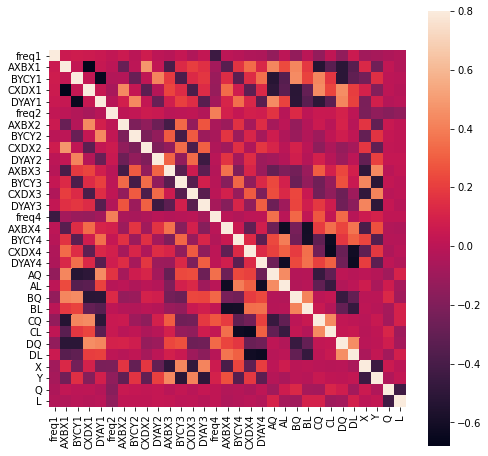

In [76]:
C_mat = train_examples.corr()
fig = plt.figure(figsize = (8,8))
X1 = X.drop(columns = ['freq3'])
sb.heatmap(C_mat, vmax = .8, square = True)


In [63]:
number_train = round(len(X)*0.8,0)
X_train = X.loc[:number_train]
X_test = X.loc[number_train:]
X_test.reset_index(inplace=True)
X_test = X_test.drop(columns = ['number'])

y_train = y.loc[:number_train]
y_test = y.loc[number_train:]
y_test.reset_index(inplace=True)
y_test = y_test.drop(columns = ['index'])

input_layer = X.shape[1]
hidden_layer = 15
output_layer = y.shape[1]

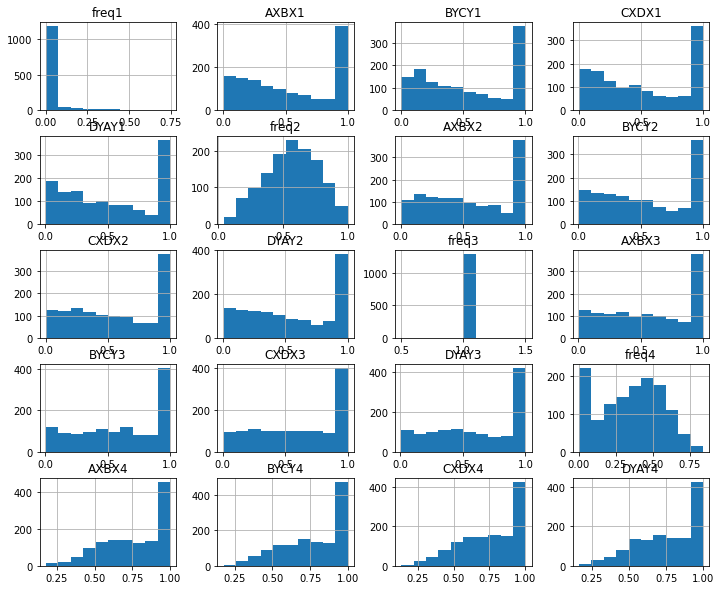

In [65]:
X.hist(figsize = (12,10))
plt.show()

In [64]:
y_test

,AQ,AL,BQ,BL,CQ,CL,DQ,DL,X,Y,Q,L
0,0.0,0.0,0.0,0.0,13.0,23.0,8.0,7.0,36.0,0.0,40.0,0.0
1,0.0,7.0,18.0,8.0,4.0,0.0,0.0,0.0,0.0,24.0,16.0,0.0
2,0.0,0.0,13.0,0.0,6.0,4.0,0.0,6.0,0.0,10.0,8.0,0.0
3,13.0,1.0,25.0,8.0,0.0,0.0,0.0,0.0,20.0,0.0,32.0,0.0
4,1.0,0.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,12.0,32.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
253,33.5,10.5,0.0,0.0,0.0,0.0,5.5,2.5,27.0,0.0,0.0,4.0
254,0.0,2.0,4.0,0.0,6.0,0.0,0.0,16.0,0.0,4.0,0.0,0.0
255,0.0,0.0,0.0,0.0,17.0,34.0,3.0,9.0,0.0,22.0,0.0,0.0
256,0.0,0.0,0.0,16.0,6.0,0.0,6.0,0.0,0.0,12.0,0.0,4.0


In [78]:
help(Sequential.add)

Help on function add in module keras.engine.sequential:

add(self, layer)
    Adds a layer instance on top of the layer stack.
    
    Args:
        layer: layer instance.
    
    Raises:
        TypeError: If `layer` is not a layer instance.
        ValueError: In case the `layer` argument does not
            know its input shape.
        ValueError: In case the `layer` argument has
            multiple output tensors, or is already connected
            somewhere else (forbidden in `Sequential` models).



In [79]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = input_layer, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(output_layer, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2688      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 12)                3084      
Total params: 38,796
Trainable params: 38,796
Non-trainable params: 0
_________________________________________________________________


In [83]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [84]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500


KeyboardInterrupt: 